In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class
from scipy.interpolate import interp1d
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 

In [2]:
models = ['reio','noreio']

cosmo={}
for M in models:
    cosmo[M] = Class()
    cosmo[M].set({'gauge':'newtonian',
                  'output':'tCl, lCl',
                  'omega_cdm':0.12038,
                  #'z_reio':11.357,
                  #'reionization_z_start_max':750,
                  #'z_reiomod_start':300,
                  #'recfast_Nz0':80000,
                  #'recfast_z_initial':1e7,
                  'recombination':'recfast',
                  #'recfast_H_frac':3e-4,
                  #'reio_parametrization':'reio_none',
                  #'100*theta_s':1.042143,
                  #'100*theta_s':1.02,
                  'background_verbose':5,
                  'input_verbose':5,
                  'h':0.67556,
                  'lensing':'yes',
                  'a_bidm':5e-4,
                   'f_bidm':0.99,
                   'A_bidm':1.7e-41,
                   'm_bidm':1,
                   'n_bidm':-4,
                   'bidm_type':'powerlaw'
                 })
    if M == 'noreio':
        cosmo[M].set({'reio_parametrization':'reio_none'})
    print([M])
    cosmo[M].compute()


['reio']
['noreio']


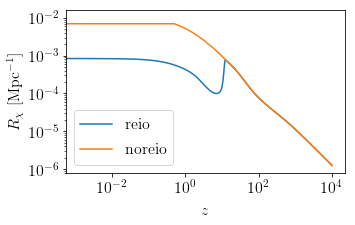

In [3]:
fig = plt.figure(1,figsize=(5,3))
ax = fig.add_subplot(111)
for M in models:
    Th = cosmo[M].get_thermodynamics()
    #print(Th.keys())
    #H = np.array([cosmo[M].Hubble(zz) for zz in Th['z']])
    ax.loglog(Th['z'],Th['Rbidm'],label=M)
ax.legend(fontsize=16)
ax.set_xlabel('$z$',fontsize=16)
ax.set_ylabel('$R_\chi$ [Mpc${}^{-1}$]',fontsize=16)

fig.savefig('Plots/RbidmReioComp.pdf',bbox_inches='tight')

Text(0,0.5,'$R_\\chi / aH$')

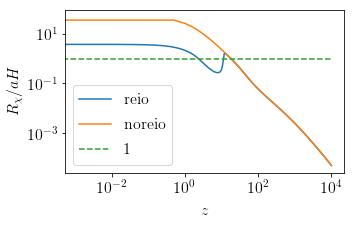

In [6]:
fig = plt.figure(1,figsize=(5,3))
ax = fig.add_subplot(111)
for M in models:
    Th = cosmo[M].get_thermodynamics()
    H = np.array([cosmo[M].Hubble(zz) for zz in Th['z']])
    ax.loglog(Th['z'],(1+Th['z'])*Th['Rbidm']/H,label=M)
ax.loglog([0,1e4],[1,1],linestyle='--',label='1')
ax.legend(fontsize=16)
ax.set_xlabel('$z$',fontsize=16)
ax.set_ylabel('$R_\chi / aH$',fontsize=16)

#fig.savefig('Plots/RoverHReioComp.pdf',bbox_inches='tight')

Text(0,0.5,'$R_\\chi / H$')

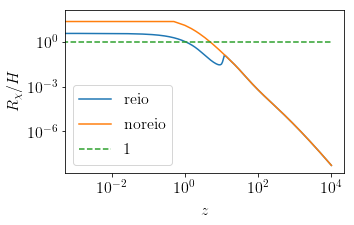

In [5]:
fig = plt.figure(1,figsize=(5,3))
ax = fig.add_subplot(111)
for M in models:
    Th = cosmo[M].get_thermodynamics()
    H = np.array([cosmo[M].Hubble(zz) for zz in Th['z']])
    ax.loglog(Th['z'],Th['Rbidm']/H,label=M)
ax.loglog([0,1e4],[1,1],linestyle='--',label='1')
ax.legend(fontsize=16)
ax.set_xlabel('$z$',fontsize=16)
ax.set_ylabel('$R_\chi / H$',fontsize=16)

In [7]:
cosmo['reio'].Hubble(0)

0.0002253425601520636

In [8]:
cosmo['noreio'].Hubble(

0.0002253425601520636